# Searching for Improvements on Clustering

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle
import string
import os

#NLP
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [24]:
import pickle

df_covid = pickle.load(open("plot_data/df_covid.p", "rb"))

In [25]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26043 entries, 0 to 27677
Data columns (total 12 columns):
paper_id               26043 non-null object
abstract               26043 non-null object
body_text              26043 non-null object
authors                26043 non-null object
title                  26043 non-null object
journal                26043 non-null object
abstract_summary       26043 non-null object
abstract_word_count    26043 non-null int64
body_word_count        26043 non-null int64
body_text_clean        26043 non-null object
abstract_clean         26043 non-null object
processed_text         26043 non-null object
dtypes: int64(2), object(10)
memory usage: 2.6+ MB


## NLP

In [5]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

stopwords[:10]

['’s',
 'those',
 'whither',
 '‘re',
 'the',
 "'m",
 'same',
 'amount',
 'wherever',
 'quite']

In [6]:
# Parser
parser = English()
parser.max_length = 4500000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [7]:
tqdm.pandas()
df_covid["processed_text"] = df_covid["body_text"].progress_apply(spacy_tokenizer)

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 26043/26043 [25:22<00:00, 17.10it/s]  


## Sample

In [26]:
df_covid = df_covid.head(6000)

##  CountVectorizer - 2**12

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}', max_features=2**12)
X = cvec.fit_transform(df_covid['processed_text'].values)

In [28]:
X.shape

(6000, 4096)

In [29]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='random',
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 1.332s...
[t-SNE] Computed neighbors for 6000 samples in 225.943s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 18.685928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.268044
[t-SNE] KL divergence after 1000 iterations: 2.284806


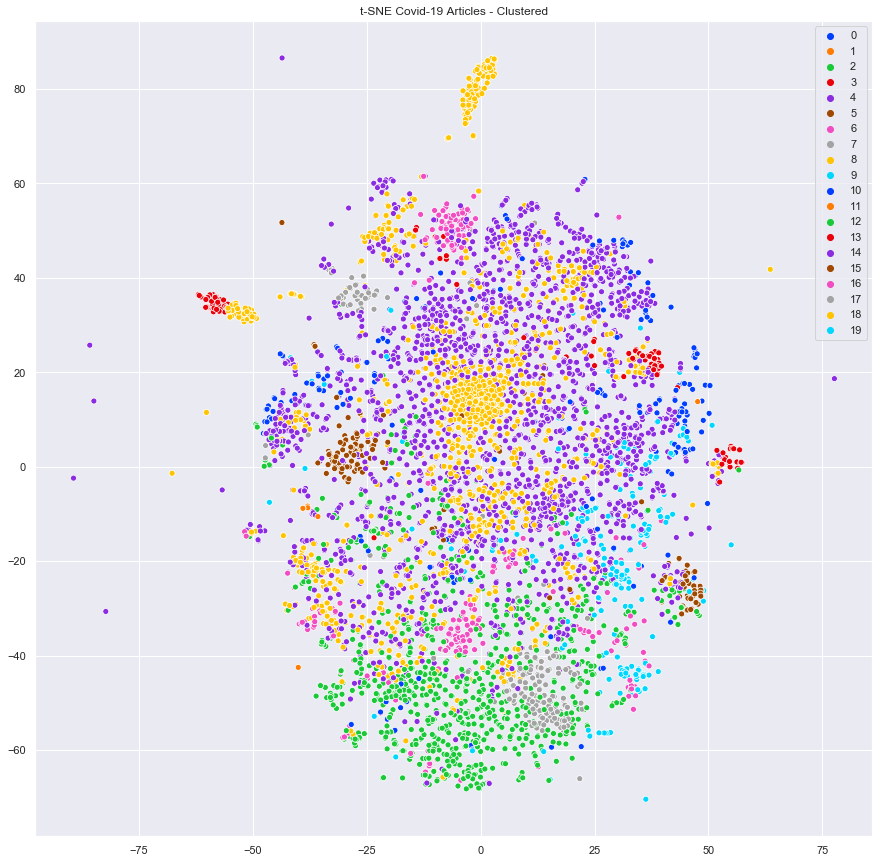

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

## TfidfVectorizer - 2**12

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**12)
X = vectorizer.fit_transform(df_covid['processed_text'].values)

In [33]:
X.shape

(6000, 4096)

In [34]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='random',
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 1.840s...
[t-SNE] Computed neighbors for 6000 samples in 228.944s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.323186
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.545258
[t-SNE] KL divergence after 1000 iterations: 1.714538


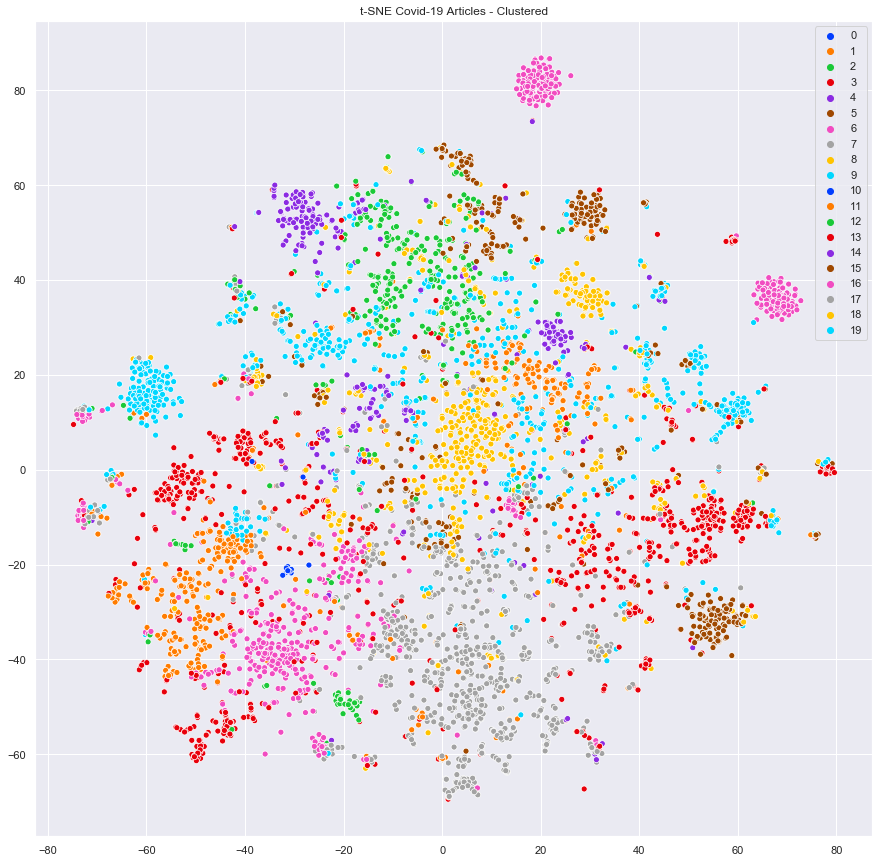

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

## TfidfVectorizer - 2**14

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**14)
X = vectorizer.fit_transform(df_covid['processed_text'].values)

In [38]:
X.shape

(6000, 16384)

In [39]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='random',
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 8.228s...
[t-SNE] Computed neighbors for 6000 samples in 908.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.327622
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.879684
[t-SNE] KL divergence after 1000 iterations: 1.823237


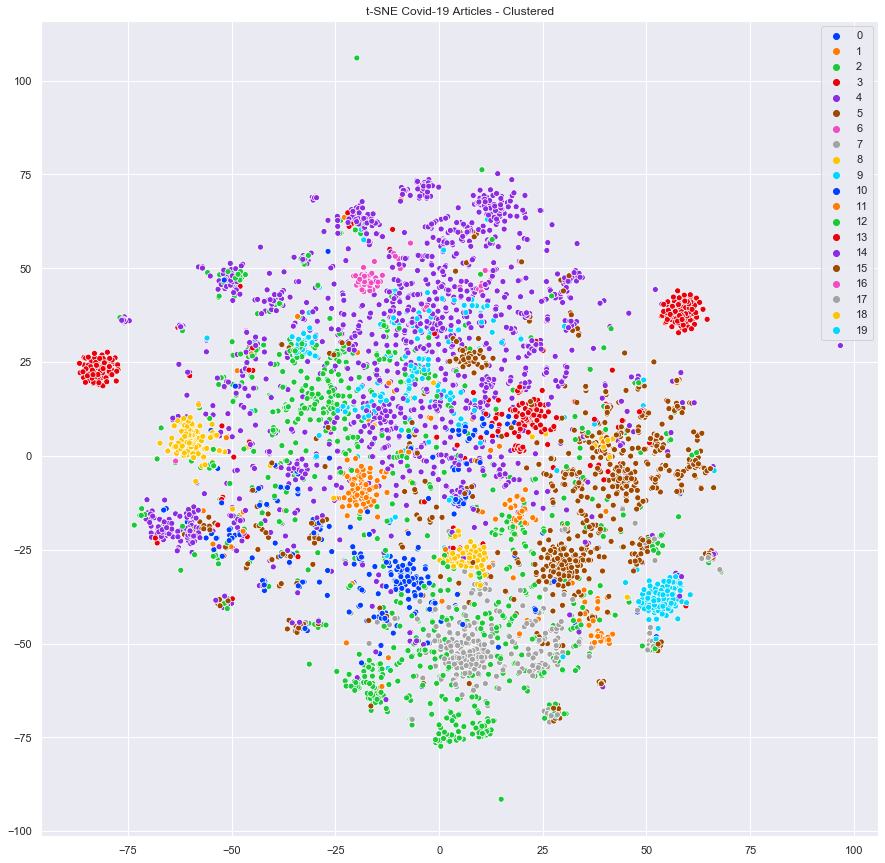

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

## BWMD - PCA

In [42]:
from pyBWMD import vectorize

X = vectorize(list(df_covid['processed_text'].values))

In [43]:
X.shape

(6000, 65536)

In [44]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_embedded = pca.fit_transform(X.toarray())

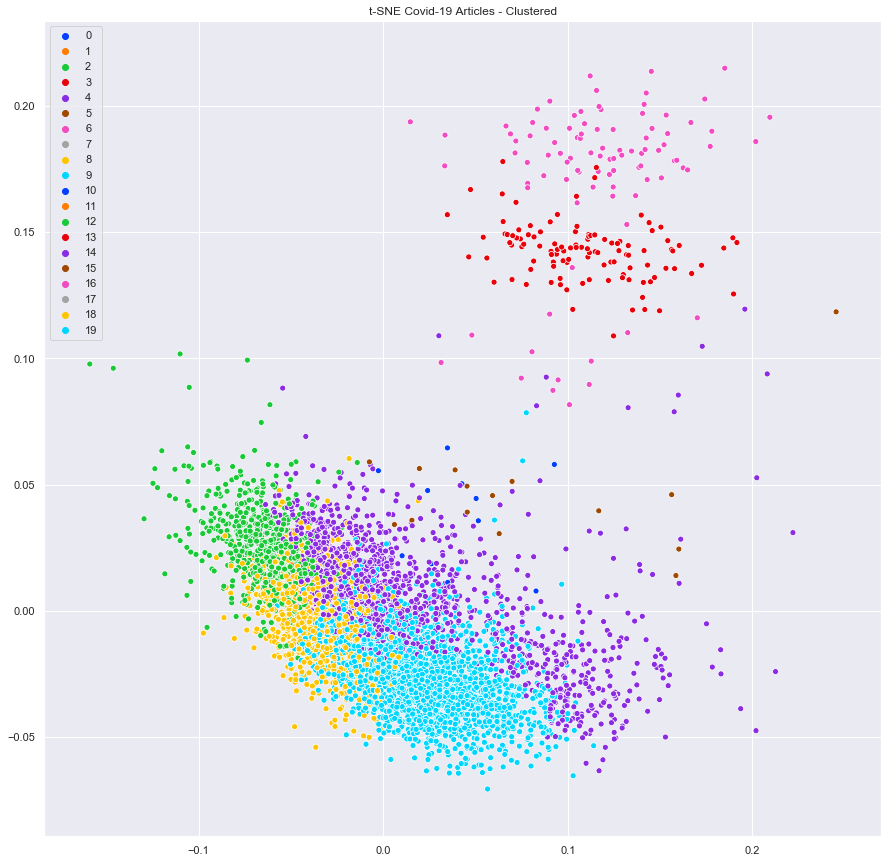

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

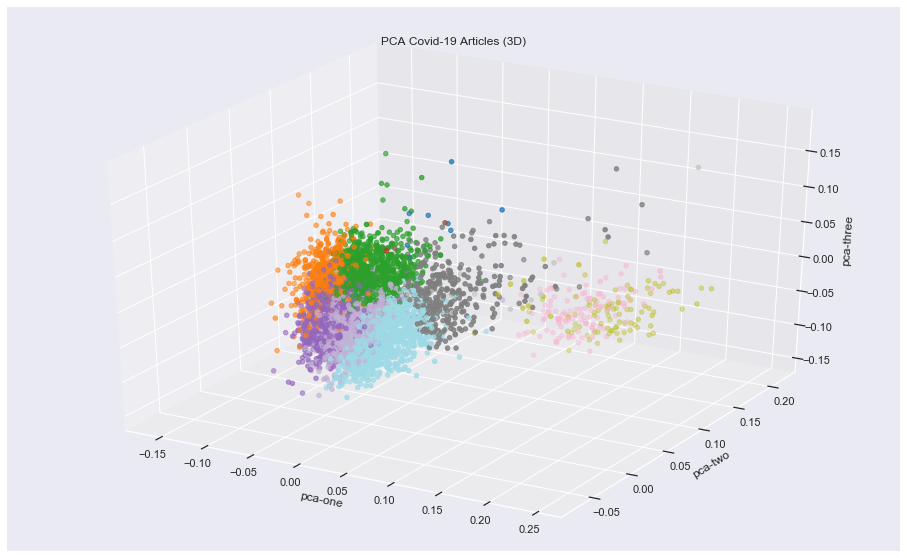

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_embedded[:,0], 
    ys=X_embedded[:,1], 
    zs=X_embedded[:,2], 
    c=y_pred, 
    cmap='tab20'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("PCA Covid-19 Articles (3D)")
plt.show()

## BWMD - t-SNE

In [48]:
from pyBWMD import vectorize

X = vectorize(list(df_covid['processed_text'].values))

In [49]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='random',
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 40.165s...
[t-SNE] Computed neighbors for 6000 samples in 3731.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.033211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.077286
[t-SNE] KL divergence after 1000 iterations: 3.268811


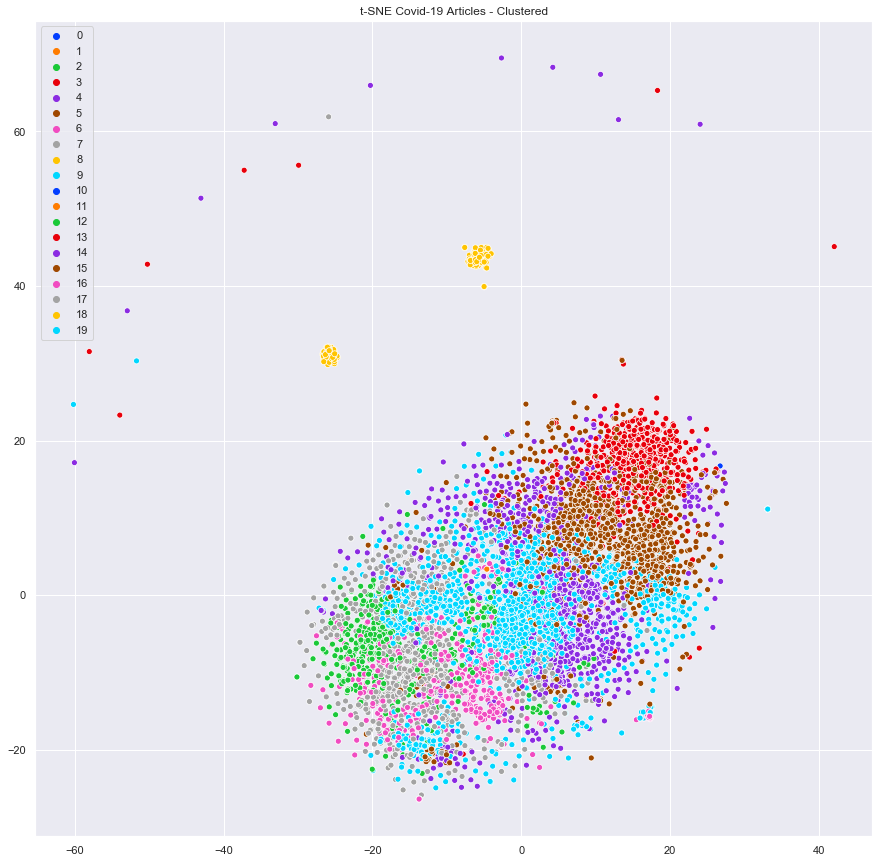

In [51]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

##  CountVectorizer - 2**14

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}', max_features=2**14)
X = cvec.fit_transform(df_covid['processed_text'].values)

In [53]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='random',
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 12.612s...
[t-SNE] Computed neighbors for 6000 samples in 920.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 19.559559
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.596901
[t-SNE] KL divergence after 1000 iterations: 2.391918


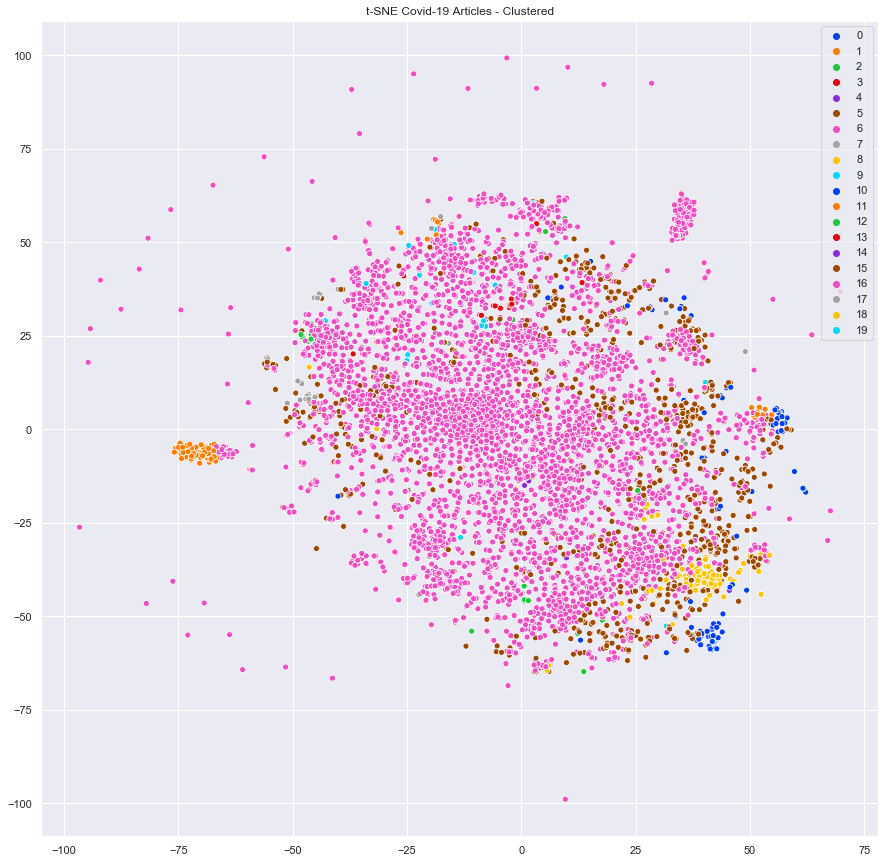

In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

## TfidfVectorizer - 2**16

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**16)
X = vectorizer.fit_transform(df_covid['processed_text'].values)

In [57]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='random',
            random_state=None, 
            method='barnes_hut', 
            angle=0.5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 30.231s...
[t-SNE] Computed neighbors for 6000 samples in 3645.501s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.313500
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.716156
[t-SNE] KL divergence after 1000 iterations: 1.858178


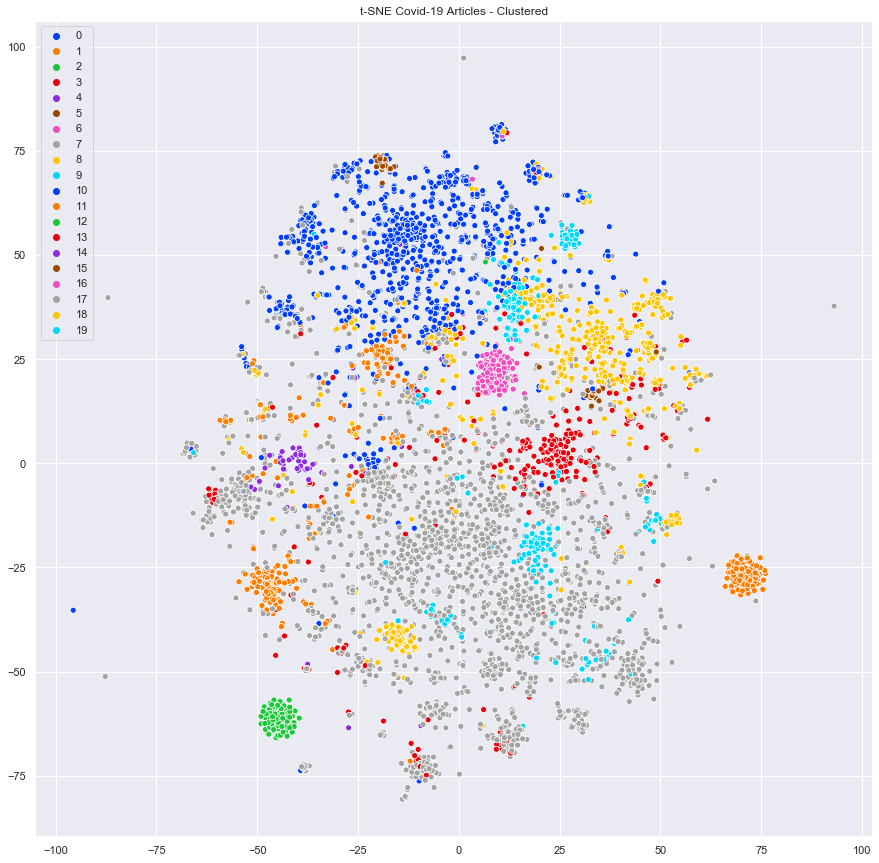

In [59]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

### perplexity=5

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 6000 samples in 52.081s...
[t-SNE] Computed neighbors for 6000 samples in 4408.910s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.230272
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.459152
[t-SNE] KL divergence after 1000 iterations: 1.750172


In [61]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

## all default

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 32.457s...
[t-SNE] Computed neighbors for 6000 samples in 4475.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.313500
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.712288
[t-SNE] KL divergence after 1000 iterations: 1.860582


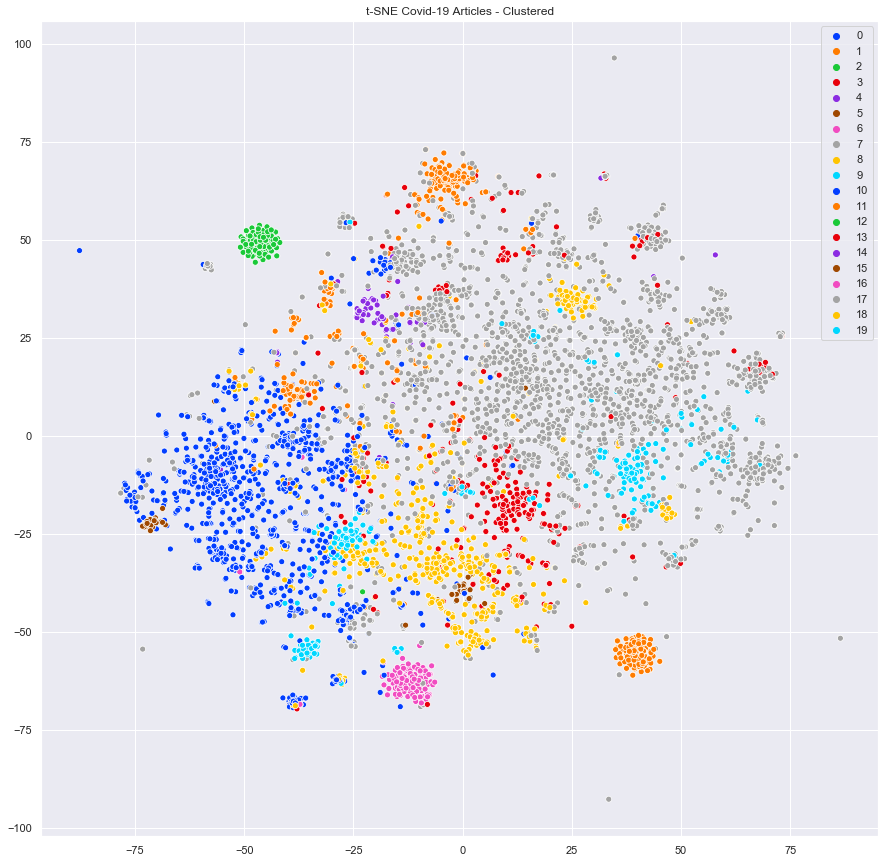

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()